<center><h1 style="font-size:39px; LINE-HEIGHT:0px">Project 2 - Classification<h1 style="font-size:39px; LINE-HEIGHT:0px"></center>
<center><h1 style="font-size:29px; LINE-HEIGHT:0px"> Machine Learning Spring 2021 <h1 style="font-size:19px; LINE-HEIGHT:0px"></center>

<h2>Default of Credit card</h2>
<h2>Source of Dataset</h2>

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

<h2>Feature Details</h2>

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (0=?, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (0=?,1=married, 2=single, 3=others)

AGE: Age in years

PAY0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY2: Repayment status in August, 2005 

PAY3: Repayment status in July, 2005 

PAY4: Repayment status in June, 2005 

PAY5: Repayment status in May, 2005 

PAY6: Repayment status in April, 2005 

BILL_AMT1: Bill in September, 2005 (NT dollar)

BILL_AMT2: Bill in August, 2005 (NT dollar)

BILL_AMT3: Bill in July, 2005 (NT dollar)

BILL_AMT4: Bill in June, 2005 (NT dollar)

BILL_AMT5: Bill statement in May, 2005 (NT dollar)

BILL_AMT6: Bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Default_Payment: Default payment for next month (1=yes, 0=no)



### Classification Task:
1) Apply two voting classifiers - one with hard voting and one with soft voting. 

2) Apply any two models with bagging and any two models with pasting. 

3) Apply any two models with AdaBoost boosting. 

4) Apply one model with gradient boosting. 

5) Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?

6) Apply deep learning models covered in class. 

7) In all the classification tasks, consider the evaluation function you used in Project 1. 


<h2> Import Modules </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


<h2>Load Data</h2> 

In [2]:
dcc = pd.read_excel('default of credit card clients.xls',skiprows=1)
dcc.drop(['ID'], axis=1, inplace=True)

In [3]:
dcc.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
dcc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
dcc.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The original dataset does not have any null value, hence we have to manually insert null values randomly in the feature set.

<b> Let's delete 5.5% of random values from the below mentioned columns , Categorical variables and Age are left alone </b>

In [6]:
dcc.columns[5:25]

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
np.random.seed(seed=0)
masking_array= np.random.randint(100,size=(dcc.shape[0], 19)) < 94.5
masking_array

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True]])

In [8]:
dcc[dcc.columns[5:25]]=dcc[dcc.columns[5:25]].where(masking_array, np.nan)

### Checking the missing values in each columns

In [9]:
dcc.isna().any()[lambda x: x] 

PAY_0                         True
PAY_2                         True
PAY_3                         True
PAY_4                         True
PAY_5                         True
PAY_6                         True
BILL_AMT1                     True
BILL_AMT2                     True
BILL_AMT3                     True
BILL_AMT4                     True
BILL_AMT5                     True
BILL_AMT6                     True
PAY_AMT1                      True
PAY_AMT2                      True
PAY_AMT3                      True
PAY_AMT4                      True
PAY_AMT5                      True
PAY_AMT6                      True
default payment next month    True
dtype: bool

#### Now we need to check the percentage of total missing data in the dataset, for this purpose we will create a function

In [10]:
def missing_data_percentage(df):
    x = ['column_name','missing_values', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = dcc.columns
    for col in columns:
        iscolumn_name = col
        ismissing_values = dcc[col].isnull().sum()
        ismissing_in_percentage = (dcc[col].isnull().sum()/dcc[col].shape[0])*100
        
        missing_data.loc[len(missing_data)] = [iscolumn_name, ismissing_values, ismissing_in_percentage]
    print(missing_data.round(2))

In [11]:
missing_data_percentage(dcc)

                   column_name missing_values  missing_in_percentage
0                    LIMIT_BAL              0                   0.00
1                          SEX              0                   0.00
2                    EDUCATION              0                   0.00
3                     MARRIAGE              0                   0.00
4                          AGE              0                   0.00
5                        PAY_0           1496                   4.99
6                        PAY_2           1490                   4.97
7                        PAY_3           1550                   5.17
8                        PAY_4           1502                   5.01
9                        PAY_5           1437                   4.79
10                       PAY_6           1474                   4.91
11                   BILL_AMT1           1459                   4.86
12                   BILL_AMT2           1473                   4.91
13                   BILL_AMT3    

### Data Transformation

In [12]:
dcc.rename(columns={'default payment next month':'Default_Payment'}, inplace=True)

#### a) Let's address the redundant data in the columns to simplify data analysis. 

Let's check the column "EDUCATION" first. As mentioned in the dataset description 
EDUCATION: (0=?, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). In this case we can combine 0,4,5,6 under a common lablel '0'.

In [13]:
print(dcc.apply(lambda col: col.unique())) 

LIMIT_BAL          [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                           [2, 1]
EDUCATION                                      [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                [1, 2, 3, 0]
AGE                [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0              [2.0, -1.0, 0.0, nan, 1.0, -2.0, 3.0, 4.0, 8.0...
PAY_2              [2.0, 0.0, nan, -2.0, -1.0, 3.0, 5.0, 7.0, 4.0...
PAY_3              [-1.0, 0.0, 2.0, -2.0, nan, 3.0, 4.0, 6.0, 7.0...
PAY_4              [-1.0, 0.0, -2.0, 2.0, nan, 3.0, 4.0, 5.0, 7.0...
PAY_5              [-2.0, 0.0, -1.0, 2.0, nan, 3.0, 5.0, 4.0, 7.0...
PAY_6              [-2.0, 2.0, 0.0, -1.0, nan, 3.0, 4.0, 6.0, 7.0...
BILL_AMT1          [3913.0, 2682.0, 29239.0, 46990.0, 8617.0, 644...
BILL_AMT2          [3102.0, 1725.0, 14027.0, 48233.0, 5670.0, 570...
BILL_AMT3          [689.0, 2682.0, 13559.0, 49291.0, 35835.0, 576...
BILL_AMT4          [0.0, 3272.0, 1

In [14]:
dcc.loc[dcc.EDUCATION >= 4, 'EDUCATION'] = 0

In [15]:
#checking the unique values in the column 'EDUCATION'
dcc['EDUCATION'].unique()

array([2, 1, 3, 0], dtype=int64)

#### Now let's check the next column, 'MARRIAGE'. From the dataset description we realize that
MARRIAGE: Marital status (0=?,1=married, 2=single, 3=others) In this case we can combine 0,3 under a common lablel '0'.

In [16]:
dcc.loc[dcc.MARRIAGE == 3, 'MARRIAGE'] = 0

In [17]:
#checking the unique values in the column 'EDUCATION'
dcc['MARRIAGE'].unique()

array([1, 2, 0], dtype=int64)

#### b) Let's fill up the missing values now

<b>For columns (PAY_0, PAY_2, PAY_4, PAY_5, PAY_6, default payment next month) the values are categorical because it's best representation of the central tendency without creating
ambiguties in case of categorical values</b>

In [18]:
dcc['PAY_0'].fillna(dcc['PAY_0'].mode()[0],inplace= True)
dcc['PAY_2'].fillna(dcc['PAY_2'].mode()[0],inplace= True)
dcc['PAY_3'].fillna(dcc['PAY_3'].mode()[0],inplace= True)
dcc['PAY_4'].fillna(dcc['PAY_4'].mode()[0],inplace= True)
dcc['PAY_5'].fillna(dcc['PAY_5'].mode()[0],inplace= True)
dcc['PAY_6'].fillna(dcc['PAY_6'].mode()[0],inplace= True)

In [19]:
dcc['Default_Payment'].fillna(dcc['Default_Payment'].mode()[0],inplace= True)

<b>For columns BILL AMOUNT and PAY AMOUNT the values are continuous and for columns containing countinuous values no matter how many times we add mean, we are in a way replacing the unknown value by the average of observed data for that variable. </b>

In [20]:
dcc['PAY_AMT1'].fillna(dcc['PAY_AMT1'].mean(),inplace= True)
dcc['PAY_AMT2'].fillna(dcc['PAY_AMT2'].mean(),inplace= True)
dcc['PAY_AMT3'].fillna(dcc['PAY_AMT3'].mean(),inplace= True)
dcc['PAY_AMT4'].fillna(dcc['PAY_AMT4'].mean(),inplace= True)
dcc['PAY_AMT5'].fillna(dcc['PAY_AMT5'].mean(),inplace= True)
dcc['PAY_AMT6'].fillna(dcc['PAY_AMT6'].mean(),inplace= True)

In [21]:
dcc['BILL_AMT1'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT2'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT3'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT4'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT5'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)
dcc['BILL_AMT6'].fillna(dcc['BILL_AMT1'].mean(),inplace= True)

#### Let's check now if any column has null values

In [22]:
dcc.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default_Payment    0
dtype: int64

### Exploratory Data Analaysis Using Data Visualization

### a) Distribution of target classes 

Text(0, 0.5, 'Number of Defaulters')

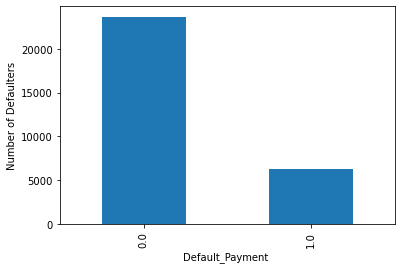

In [23]:
dcc['Default_Payment'].value_counts().plot(kind='bar')
plt.xlabel('Default_Payment ')
plt.ylabel('Number of Defaulters')

###### We can cleary see that Distribution of target classes is highly imbalanced and most people pay credit cards bills on time 

### b) Co-relation of feature-set

<AxesSubplot:>

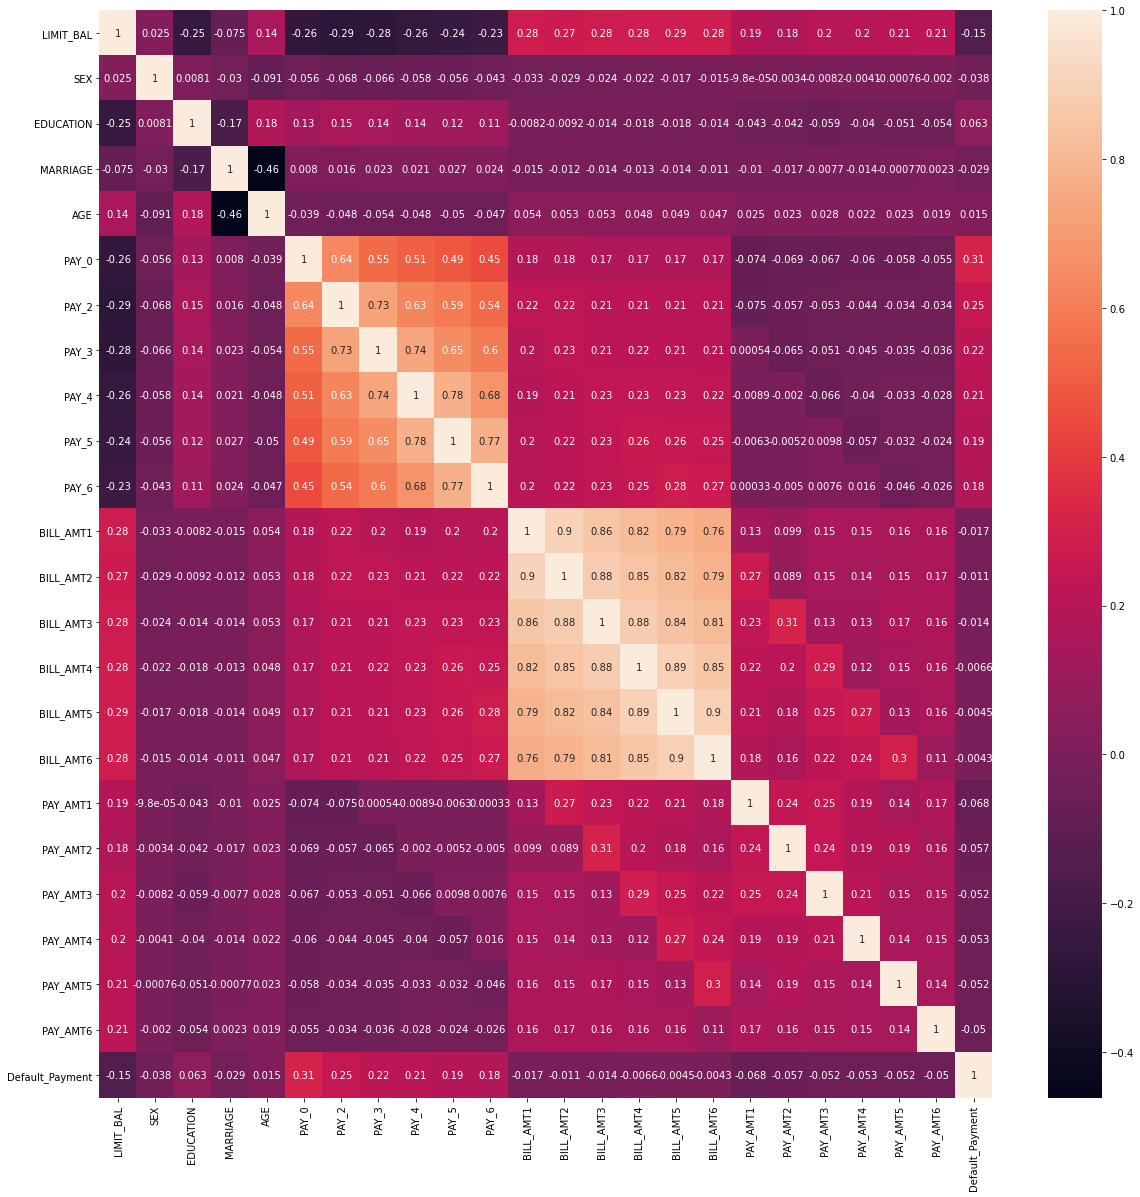

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(dcc.corr(), annot=True)

#####  1)PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 which represent payment status from April 2005 to September 2005 are highly co-related to each other indicating late payment in one month could lead to late payment in subsequent months as well
##### 2) BILL_AMT1 ,BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are the Amount of bill statement from April to September are again strongly co-related 

### c) Default Payment by AGE and Limit Balance

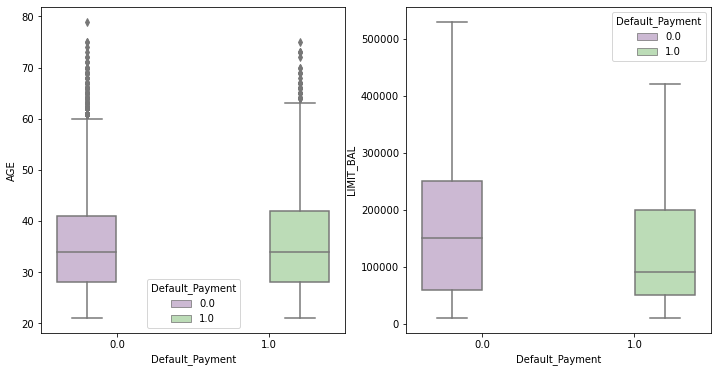

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Default_Payment", y="AGE", hue="Default_Payment",data=dcc, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Default_Payment", y="LIMIT_BAL", hue="Default_Payment",data=dcc, palette="PRGn",showfliers=False)
plt.show();

##### 1) The dataset mostly contains people in their late-20s to late-40s who are both defaulters and non-defaulters
##### 2) Majority of Defaulters have Limit Balance of less the 200000

### d) Credit Limit by SEX

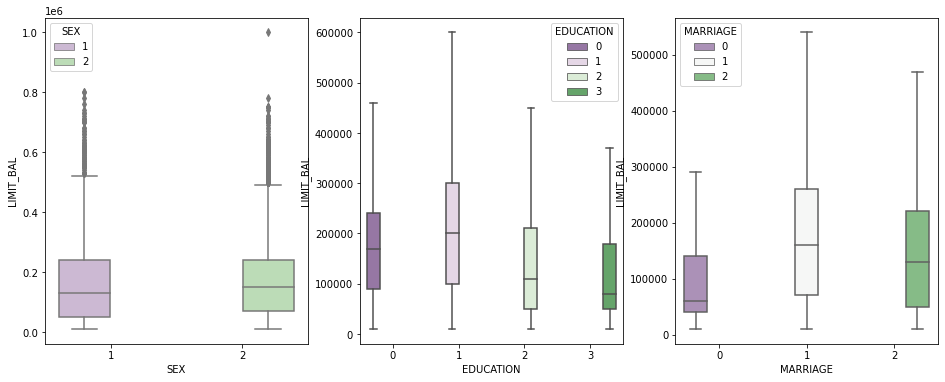

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=dcc, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="EDUCATION", y="LIMIT_BAL", hue="EDUCATION",data=dcc, palette="PRGn",showfliers=False)
s = sns.boxplot(ax = ax3, x="MARRIAGE", y="LIMIT_BAL", hue="MARRIAGE",data=dcc, palette="PRGn",showfliers=False)
plt.show()

##### 1) The dataset contains almost similar distribution LIMIT_BAL for both male
##### 2) The median LIMIT_BAL  of the people who have graduate school degree in highest. 
##### 3) People who are married are observed to have greater median of LIMIT_BAL than single and others. 

### There are no recommended changes 

### Data Prepartion for Analysis and Classification 

### Train Test Split

In [27]:
X = dcc.drop('Default_Payment',axis =1)
y = dcc['Default_Payment']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<h2> CLASSIFICATION TASKS </h2>

#### For all classification tasks we will have the follwing approach
1. Find the best Hyperparaemeters for the base class using Grid Search
2. Find the best Hyperparaemeters for the voting/bagging/booster class using Grid Search
3. Combine the best parameters to create a new model 
4. Train and Test the new model on the dataset and find the train score, test score, accuracy, f1 score. 

<h3> 1) Apply two voting classifiers - one with hard voting and one with soft voting. </h3> 

##### Since each model participating in soft voting should have an ability to predict probablity as a part of model training, we are going to use Logistic Regression and Support Vector Machine as two voting classifier for this task. 

### HARD VOTING : Class prediction with the largest sum of votes from base models


In [29]:
param_grid_logit = { 'max_iter' : range(1,120), 'penalty' : ['l1','l2'],'C' : [0.1, 1, 10, 100, 1000]}
grid_search_logit = GridSearchCV(estimator=LogisticRegression(random_state = 0), param_grid = param_grid_logit, 
                                 cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
grid_search_logit.fit(X_train, y_train)

Fitting 5 folds for each of 1190 candidates, totalling 5950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4258 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5464 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5950 out of 5950 | elapsed:  2.5min finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': range(1, 120), 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [30]:
print("Best parameters Logistic Regression: {}".format(grid_search_logit.best_params_))

Best parameters Logistic Regression: {'C': 1000, 'max_iter': 90, 'penalty': 'l2'}


In [31]:
logistic_hvoting = LogisticRegression(C=1000, random_state=0, max_iter=90, penalty='l2')
logistic_hvoting.fit(X_train, y_train)

svm_hvoting = SVC(C = 10, probability=True, random_state=0)
svm_hvoting.fit(X_train, y_train) 

h_voting_classifier = VotingClassifier(estimators=[('lr', logistic_hvoting), ('svc', svm_hvoting)], voting='hard')
h_voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1000, max_iter=90,
                                                 random_state=0)),
                             ('svc',
                              SVC(C=10, probability=True, random_state=0))])

In [32]:
for hvoting in (logistic_hvoting, svm_hvoting, h_voting_classifier):
    hvoting.fit(X_train, y_train)
    y_pred = hvoting.predict(X_test)
    print(hvoting.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.817
SVC 0.823
VotingClassifier 0.815


### SOFT VOTING : Class prediction with the average probability from models.

In [33]:
logistic_svoting = LogisticRegression( random_state=0, C=1000, max_iter=90, penalty='l2')
logistic_svoting.fit(X_train, y_train)

svm_svoting = SVC(C = 10, probability=True, random_state=0)
svm_svoting.fit(X_train, y_train) 

s_voting_classifier = VotingClassifier(estimators=[('lr', logistic_svoting), ('svc', svm_svoting)], voting='soft')
s_voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1000, max_iter=90,
                                                 random_state=0)),
                             ('svc',
                              SVC(C=10, probability=True, random_state=0))],
                 voting='soft')

In [34]:
for svoting in (logistic_svoting, svm_svoting, s_voting_classifier):
    svoting.fit(X_train, y_train)
    y_pred = svoting.predict(X_test)
    print(svoting.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.817
SVC 0.823
VotingClassifier 0.82


<h3> 2) Apply any two models with bagging and any two models with pasting. </h3>

### Bagging : Bootstrap = 'True'

##### This ensemble machine learning algorithm combines the result of multiple decision tress derived from running the model on the samples in  the bags (collection of random samples) . The sample used for each decision tree is randomly selected and everytime a new bag is created all the sample in training dataset are available for the bagging process, allowing it to be selected again and perhaps multiple times in the new bags

### a) Decision Tree Bagging Classifier

In [35]:
param_grid_dtree = {'max_depth': range(1,15)}
dtree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), cv=7, 
                                 param_grid = param_grid_dtree, return_train_score=True)
dtree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 15)}, return_train_score=True)

In [36]:
print("Best parameters : Decision Tree grid search : {}".format(dtree_grid_search.best_params_))

Best parameters : Decision Tree grid search : {'max_depth': 4}


In [37]:
param_grid_bag = {'n_estimators':[200, 300, 400, 500], 'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5]}
              
bag_dtree_classifier = BaggingClassifier(DecisionTreeClassifier(max_depth = 4, random_state = 0))
bag_grid_search = GridSearchCV(bag_dtree_classifier, param_grid = param_grid_bag, cv = 5, n_jobs = -1)
bag_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=0)),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [38]:
print("Best parameters : Decision Tree Bagging : {}".format(bag_grid_search.best_params_))

Best parameters : Decision Tree Bagging : {'max_samples': 0.5, 'n_estimators': 200}


#### Combining the best parameters of base model and bagging to create a new model. 

### .

In [39]:
best_dtree = DecisionTreeClassifier(max_depth = 4, random_state=0)
best_bagging = BaggingClassifier(best_dtree, n_estimators=200, max_samples=0.5, oob_score= True,
                                 bootstrap=True, n_jobs=-1, random_state=0)
best_bagging.fit(X_train, y_train)
y_pred = best_bagging.predict(X_test)

In [40]:
print('Train score: %.3f'%best_bagging.score(X_train, y_train))
print('Test score: %.3f'%best_bagging.score(X_test, y_test))
print('Out-of-bag score: %.3f'%best_bagging.oob_score_)

Train score: 0.826
Test score: 0.830
Out-of-bag score: 0.823


In [41]:
print(classification_report(y_test, best_bagging.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.95      0.90      5950
  No Default       0.67      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [42]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5677  273]
 [1004  546]]


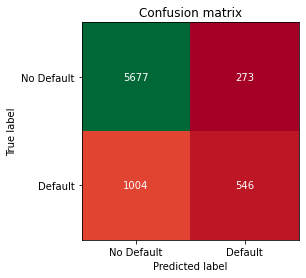

In [43]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [44]:
print('Precision score : {:.3f}'.format(precision_score(y_test, best_bagging.predict(X_test))))

Precision score : 0.667


In [45]:
print('Recall score : {:.3f} '.format(recall_score(y_test, best_bagging.predict(X_test))))

Recall score : 0.352 


In [46]:
print('f1 score : {:.3f} '.format(f1_score(y_test, best_bagging.predict(X_test))))

f1 score : 0.461 


In [47]:
print('Accuracy : {:.3f} '.format(accuracy_score(y_test, best_bagging.predict(X_test))))

Accuracy : 0.830 


### b) Random Forest Bagging Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {'max_depth': range(1,10),'n_estimators':[100, 300, 500], 
              'max_features':[0.3, 0.5],'max_samples':[0.1, 0.5]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = param_grid_rf, cv = 5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10), 'max_features': [0.3, 0.5],
                         'max_samples': [0.1, 0.5],
                         'n_estimators': [100, 300, 500]})

In [49]:
print("Best parameters : Random Forest Bagging grid search :{}".format(rf_grid_search.best_params_))

Best parameters : Random Forest Bagging grid search :{'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


#### Combining the best paratmeters of base model and bagging to create a new model

In [50]:
best_rf = RandomForestClassifier(bootstrap = True, max_depth = 5, max_features = 0.5, 
                                 max_samples = 0.5, n_estimators = 500, random_state = 0)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [51]:
print('Test score: %.3f'%best_rf.score(X_test, y_test))
print('Train score: %.3f'%best_rf.score(X_train, y_train))

Test score: 0.830
Train score: 0.827


In [52]:
print(classification_report(y_test, y_pred=best_rf.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.95      0.90      5950
  No Default       0.67      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



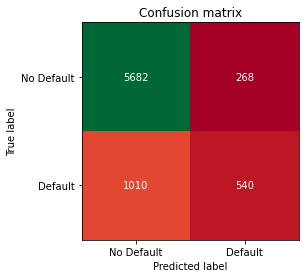

In [53]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = best_rf.predict(X_test), y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [54]:
print('Precision score : {:.3f}'.format(precision_score(y_test, best_rf.predict(X_test))))

Precision score : 0.668


In [55]:
print('Recall score : {:.3f} '.format(recall_score(y_test, best_rf.predict(X_test))))

Recall score : 0.348 


In [56]:
print('f1 score : {:.3f} '.format(f1_score(y_test, best_rf.predict(X_test))))

f1 score : 0.458 


In [57]:
print('Accuracy : {:.3f} '.format(accuracy_score(y_test, best_rf.predict(X_test))))

Accuracy : 0.830 


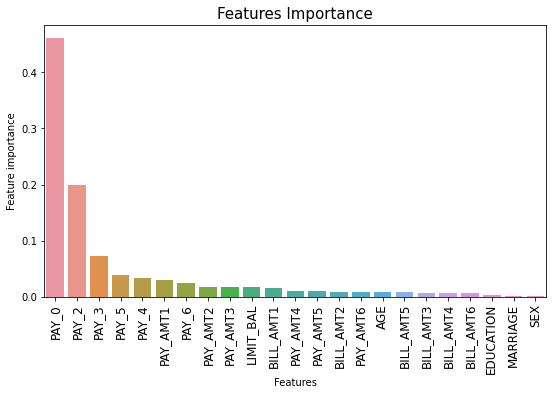

In [58]:
figt = pd.DataFrame({'Features': X.columns, 'Feature importance': best_rf.feature_importances_ })
figt = figt.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (9,5))
plt.title('Features Importance',fontsize=15)
s = sns.barplot(x='Features',y='Feature importance',data=figt)
s.set_xticklabels(s.get_xticklabels(), fontsize=12, rotation=90 )
plt.show()   



### Pasting : Bootstrap = 'False'

##### This ensemble machine learning algorithm combines the result of multiple decision tress derived the bags (collection of random samples) . The sample used for each decision tree is randomly selected and are unavailable for subsequent bagging cycles. In other words the collection of sample in each bag is unique.

### a) Decision Tree Pasting Classifier

##### We have already found best parameters for the base models while performing Bagging, Hence for the purpose of pasting we will simply combine the best parameters that are already found above with the only difference, Bootstrap ='False'

In [59]:
print("Best parameters : Decision Tree grid search : {}".format(dtree_grid_search.best_params_))

Best parameters : Decision Tree grid search : {'max_depth': 4}


In [60]:
print("Best parameters : Decision Tree Pasting : {}".format(bag_grid_search.best_params_))

Best parameters : Decision Tree Pasting : {'max_samples': 0.5, 'n_estimators': 200}


#### Combining the best parameters of base model and pasting to create a new model. 

#### .

In [61]:
best_dtree = DecisionTreeClassifier(max_depth = 4, random_state=0)
best_pasting = BaggingClassifier(best_dtree, bootstrap=False, n_estimators=200, max_samples=0.5, n_jobs=-1, random_state=0)

best_pasting.fit(X_train, y_train)
y_pred = best_pasting.predict(X_test)

In [62]:
print('Train score: %.3f'%best_pasting.score(X_train, y_train))
print('Test score: %.3f'%best_pasting.score(X_test, y_test))

Train score: 0.826
Test score: 0.829


In [63]:
print(classification_report(y_test, best_pasting.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.95      0.90      5950
  No Default       0.66      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [64]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5671  279]
 [1002  548]]


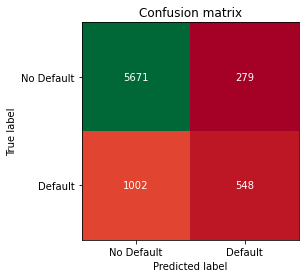

In [65]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [66]:
print('Precision score : {:.3f}'.format(precision_score(y_test, best_pasting.predict(X_test))))

Precision score : 0.663


In [67]:
print('Recall score : {:.3f} '.format(recall_score(y_test, best_pasting.predict(X_test))))

Recall score : 0.354 


In [68]:
print('f1 score : {:.3f} '.format(f1_score(y_test, best_pasting.predict(X_test))))

f1 score : 0.461 


In [69]:
print('Accuracy : {:.3f} '.format(accuracy_score(y_test, best_pasting.predict(X_test))))

Accuracy : 0.829 


### b) Random Forest Pasting Classifier


In [70]:
print("Best parameters : Random Forest grid search :{}".format(rf_grid_search.best_params_))

Best parameters : Random Forest grid search :{'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


#### Combining the best parameters of base model and pasting to create a new model

In [71]:
best_pasting_rf = RandomForestClassifier(bootstrap = False, max_depth = 5, max_features = 0.5,max_samples = 0.5, n_estimators = 500, random_state = 0)
best_pasting_rf.fit(X_train, y_train)
y_pred = best_pasting_rf.predict(X_test)

In [72]:
print('Test score: %.3f'%best_pasting_rf.score(X_test, y_test))
print('Train score: %.3f'%best_pasting_rf.score(X_train, y_train))

Test score: 0.830
Train score: 0.827


In [73]:
print(classification_report(y_test, y_pred=best_pasting_rf.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.96      0.90      5950
  No Default       0.67      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



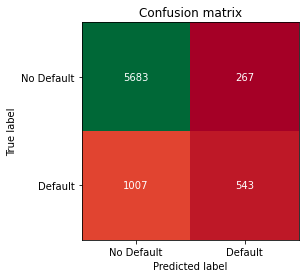

In [74]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = best_pasting_rf.predict(X_test), y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [75]:
print('Precision score : {:.3f}'.format(precision_score(y_test, best_pasting_rf.predict(X_test))))

Precision score : 0.670


In [76]:
print('Recall score : {:.3f} '.format(recall_score(y_test, best_pasting_rf.predict(X_test))))

Recall score : 0.350 


In [77]:
print('f1 score : {:.3f} '.format(f1_score(y_test, best_pasting_rf.predict(X_test))))

f1 score : 0.460 


In [78]:
print('Accuracy : {:.3f} '.format(accuracy_score(y_test, best_pasting_rf.predict(X_test))))

Accuracy : 0.830 


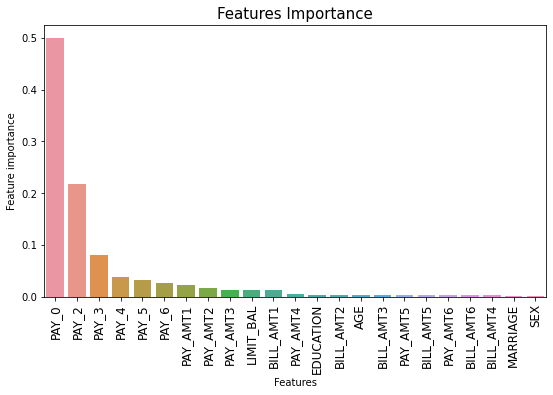

In [79]:
figt = pd.DataFrame({'Features': X.columns, 'Feature importance': best_pasting_rf.feature_importances_ })
figt = figt.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (9,5))
plt.title('Features Importance',fontsize=15)
s = sns.barplot(x='Features',y='Feature importance',data=figt)
s.set_xticklabels(s.get_xticklabels(), fontsize=12, rotation=90 )
plt.show()   


### 3. ADABOOSTING

##### The goal in AdaBoosting is to change the cost function in every iteration by giving importance to those function which haven't been predicted correctly


### a) Logistic Regression AdaBoost

In [80]:
param_grid_logit = { 'max_iter' : range(1,150), 'penalty' : ['l1','l2'], 'C' : [0.01, 0.1, 1, 10, 100, 1000]}
logit_class_CV = GridSearchCV(LogisticRegression(random_state=0), param_grid = param_grid_logit, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
logit_class_CV.fit(X_train, y_train)

Fitting 5 folds for each of 1788 candidates, totalling 8940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 2178 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 2978 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5090 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5840 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8552 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 8940 out of 8940 | elapsed:  3.8min finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': range(1, 150), 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [81]:
print("Best parameters: Logistic Regression {}".format(logit_class_CV.best_params_))

Best parameters: Logistic Regression {'C': 1000, 'max_iter': 90, 'penalty': 'l2'}


In [82]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [200,250,500,600], 'learning_rate': [.02, .05, 0.5, 1]}

log_ada_gs = GridSearchCV(AdaBoostClassifier(LogisticRegression(C=1000, max_iter=90, penalty='l2'),algorithm="SAMME.R",
                                             random_state = 0), param_grid, cv=7, return_train_score=True, verbose=True)
log_ada_gs.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed: 13.5min finished


GridSearchCV(cv=7,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=1000,
                                                                            max_iter=90),
                                          random_state=0),
             param_grid={'learning_rate': [0.02, 0.05, 0.5, 1],
                         'n_estimators': [200, 250, 500, 600]},
             return_train_score=True, verbose=True)

In [83]:
print("Best parameters: Logistic Regression AdaBoost {}".format(log_ada_gs.best_params_))

Best parameters: Logistic Regression AdaBoost {'learning_rate': 1, 'n_estimators': 200}


#### Combining Best Parameters for AdaBoosting 

In [84]:
best_logit_ada = AdaBoostClassifier(LogisticRegression(random_state=0), random_state=0, n_estimators= 200, 
                                    algorithm="SAMME.R", learning_rate=1)
best_logit_ada.fit(X_train, y_train)
y_pred = best_logit_ada.predict(X_test)

In [85]:
print("Accuracy :",accuracy_score(y_test, y_pred).round(3))

Accuracy : 0.801


In [86]:
print(classification_report(y_test, y_pred= best_logit_ada.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.80      0.99      0.89      5950
  No Default       0.72      0.06      0.12      1550

    accuracy                           0.80      7500
   macro avg       0.76      0.53      0.50      7500
weighted avg       0.79      0.80      0.73      7500



In [87]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5912   38]
 [1452   98]]


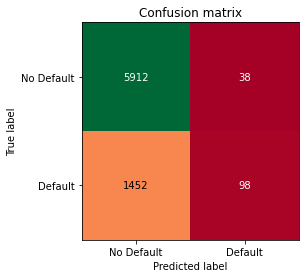

In [88]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

### b) Decision Tree AdaBoost

In [89]:
param_grid_dtree = {'max_depth': range(1,10),'criterion':['gini','entropy'],'min_samples_leaf' : range(2,50)}
GS_results_dtrees = GridSearchCV(DecisionTreeClassifier(random_state=0), cv = 7, param_grid = param_grid_dtree , verbose = True, n_jobs = -1)
GS_results_dtrees.fit(X_train, y_train)

Fitting 7 folds for each of 864 candidates, totalling 6048 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6048 out of 6048 | elapsed:  3.8min finished


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 50)},
             verbose=True)

In [90]:
print("Best parameters: Decision Tree Adaboost {}".format(GS_results_dtrees.best_params_))

Best parameters: Decision Tree Adaboost {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 48}


In [91]:
param_grid = {'n_estimators': [100,150,250,400], 'learning_rate': [.02, .05, 0.5, 1]}
dtree_ada_gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion ='entropy',max_depth=4, min_samples_leaf=48),
                                               algorithm="SAMME.R",random_state = 0), 
                            param_grid, cv=7, return_train_score=True, verbose=True)
dtree_ada_gs.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed: 46.7min finished


GridSearchCV(cv=7,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=4,
                                                                                min_samples_leaf=48),
                                          random_state=0),
             param_grid={'learning_rate': [0.02, 0.05, 0.5, 1],
                         'n_estimators': [100, 150, 250, 400]},
             return_train_score=True, verbose=True)

In [92]:
print("Best parameters: Decision Tree AdaBoost {}".format(dtree_ada_gs.best_params_))

Best parameters: Decision Tree AdaBoost {'learning_rate': 0.02, 'n_estimators': 250}


#### Combining Best Parameters for AdaBoosting 

In [93]:
best_dtree_ada = AdaBoostClassifier(DecisionTreeClassifier(criterion ='entropy',max_depth=4, min_samples_leaf=48),
                                    random_state=0, n_estimators=250, algorithm="SAMME.R", learning_rate=0.02)
best_dtree_ada.fit(X_train, y_train)
y_pred = best_dtree_ada.predict(X_test)

In [94]:
print("Accuracy :",accuracy_score(y_test, y_pred).round(3))

Accuracy : 0.83


In [95]:
print(classification_report(y_test, y_pred= best_dtree_ada.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.96      0.90      5950
  No Default       0.67      0.35      0.46      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [96]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5685  265]
 [1013  537]]


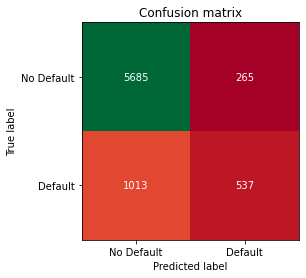

In [97]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

### 4. Gradient Boosting 

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [25,50,100,200],'learning_rate': [0.05,0.1,0.2,0.5,1], 'max_depth': np.arange(1,6)}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid,
                              cv=10, return_train_score=True, n_jobs=-1, verbose=True)
gb_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 33.3min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': [25, 50, 100, 200]},
             return_train_score=True, verbose=True)

In [99]:
print("Best parameters Gradient Boosting: {}".format(gb_grid_search.best_params_))

Best parameters Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [100]:
best_gbrt = GradientBoostingClassifier(random_state=0, n_estimators=50, learning_rate=0.1, max_depth = 4)
best_gbrt.fit(X_train, y_train)
y_pred = best_gbrt.predict(X_test)

In [101]:
print("Accuracy :",accuracy_score(y_test, y_pred).round(3))

Accuracy : 0.831


In [102]:
print(classification_report(y_test, y_pred= best_gbrt.predict(X_test), target_names=["Default ", "No Default"]))

              precision    recall  f1-score   support

    Default        0.85      0.95      0.90      5950
  No Default       0.67      0.36      0.47      1550

    accuracy                           0.83      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [103]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5678  272]
 [ 996  554]]


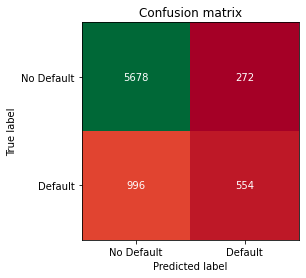

In [104]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

<h2> PCA </h2>

### Train Test Split

In [105]:
X = dcc.drop('Default_Payment',axis =1)
y = dcc['Default_Payment']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [106]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [107]:
X_train.shape

(22500, 23)

#### With an Explained Variance ratio of 95% let's perform Principal Component analyisis to reduce the dimensionality

In [108]:
from sklearn.decomposition import PCA
pca_classification = PCA(n_components = 0.95, random_state = 0)
X_train_pca = pca_classification.fit_transform(X_train)
X_test_pca = pca_classification.transform(X_test)

#### Let's check how much of dimensionality is reduced using Explained Variance ratio of 95%.

In [109]:
X_train_pca.shape

(22500, 8)

#### As we can see that total 15 columns were dropped as a part of dimensionality reduction


In [110]:
pca_classification.n_components_

8

<h2> 1. k-nearest neighbors (KNN) - PCA <h2>

#### Finding best parameters for the model using grid search

In [111]:
gs_knn_para = {'n_neighbors':range(1,20),'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']}

gs_knn = GridSearchCV(KNeighborsClassifier(), gs_knn_para, verbose = 1, cv = 7, n_jobs = -1)
gs_knn.fit(X_train_pca, y_train)

Fitting 7 folds for each of 76 candidates, totalling 532 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 532 out of 532 | elapsed:   35.6s finished


GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [112]:
gs_knn.best_score_

0.8067113758997345

In [113]:
print("KNN grid search Best Parameters {}".format(gs_knn.best_params_))

KNN grid search Best Parameters {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}


#### Applying best parameters  'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform' obtained using grid search

In [114]:
knn_pca = KNeighborsClassifier(metric ='manhattan', n_neighbors=13, weights= 'uniform')
knn_pca.fit(X_train_pca, y_train)
y_pred = knn_pca.predict(X_test_pca)

In [115]:
print('Training score: {:.3f}'.format(knn_pca.score(X_train_pca,y_train)))
print('Testing score: {:.3f}'.format(knn_pca.score(X_test_pca,y_test)))

Training score: 0.823
Testing score: 0.808


In [116]:
print(classification_report(y_pred = y_pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      5950
         1.0       0.57      0.27      0.37      1550

    accuracy                           0.81      7500
   macro avg       0.70      0.61      0.63      7500
weighted avg       0.78      0.81      0.78      7500



In [117]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5643  307]
 [1135  415]]


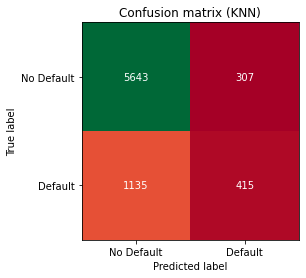

In [118]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [119]:
print('KNN-PCA f1-score : {:.3f} '.format(f1_score(y_test,knn_pca.predict(X_test_pca))))


KNN-PCA f1-score : 0.365 


In [120]:
print('KNN-PCA Accuracy : {:.3f} '.format(accuracy_score(y_test, knn_pca.predict(X_test_pca))))

KNN-PCA Accuracy : 0.808 


<h2> 2. Logistic Regression - PCA <h2>

#### Finding best parameters for the model using grid search

In [121]:
gs_logit_para = { 'max_iter' : range(1,200), 'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs_logit = GridSearchCV(LogisticRegression(), param_grid = gs_logit_para, cv = 5, verbose = 1, 
                        n_jobs = -1, return_train_score = True)
gs_logit.fit(X_train_pca, y_train)

Fitting 5 folds for each of 2786 candidates, totalling 13930 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 13874 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 13930 out of 13930 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': range(1, 200), 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [122]:
gs_logit.best_score_

0.8048

In [123]:
print("Logistic Regression -PCA grid search Best Parameters {}".format(gs_logit.best_params_))

Logistic Regression -PCA grid search Best Parameters {'C': 100, 'max_iter': 9, 'penalty': 'l2'}


#### Applying best parameters 'C': 100, 'max_iter': 9, 'penalty': 'l2' obtained using grid search

In [124]:
logit_pca = LogisticRegression(C=100, max_iter=9, penalty='l2')
logit_pca.fit(X_train_pca, y_train)
y_pred = logit_pca.predict(X_test_pca)

In [125]:
print('Training score: {:.3f}'.format(logit_pca.score(X_train_pca,y_train)))
print('Testing score: {:.3f}'.format(logit_pca.score(X_test_pca,y_test)))

Training score: 0.805
Testing score: 0.809


In [126]:
print(classification_report(y_pred = y_pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      5950
         1.0       0.66      0.15      0.25      1550

    accuracy                           0.81      7500
   macro avg       0.74      0.57      0.57      7500
weighted avg       0.78      0.81      0.76      7500



In [127]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5826  124]
 [1311  239]]


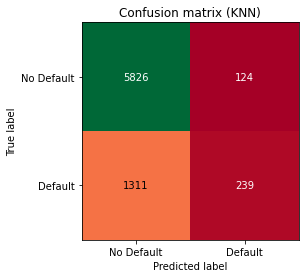

In [128]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [129]:
print('Logistic Regression-PCA f1-score : {:.3f} '.format(f1_score(y_test,logit_pca.predict(X_test_pca))))

Logistic Regression-PCA f1-score : 0.250 


In [130]:
print('Logistic Regression-PCA Accuracy : {:.3f} '.format(accuracy_score(y_test, logit_pca.predict(X_test_pca))))

Logistic Regression-PCA Accuracy : 0.809 


<h2> 3. Linear Support Vector Machine Classifier- PCA <h2>

#### Finding best parameters for the model using grid search

In [131]:
from sklearn.svm import LinearSVC
gs_linearsvm_para= { 'max_iter' : range(1,150),'C' : [ 0.001,0.01, 0.1, 1, 10, 100,1000]}
gs_linearsvm = GridSearchCV(LinearSVC(), param_grid = gs_linearsvm_para, cv = 5, verbose = 1,
                            n_jobs = -1, return_train_score = True)
gs_linearsvm.fit(X_train_pca, y_train)

Fitting 5 folds for each of 1043 candidates, totalling 5215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4448 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:  4.6min finished


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': range(1, 150)},
             return_train_score=True, verbose=1)

In [132]:
gs_linearsvm.best_score_

0.8049777777777779

In [133]:
print("Linear SVM - PCA grid search Best Parameters {}".format(gs_linearsvm.best_params_))

Linear SVM - PCA grid search Best Parameters {'C': 10, 'max_iter': 69}


### .

#### Applying best parameters 'C': 10, 'max_iter': 69 obtained using grid search

In [134]:
linearsvm_pca = LinearSVC(C= 10, max_iter= 69)
linearsvm_pca.fit(X_train_pca, y_train)
y_pred = linearsvm_pca.predict(X_test_pca)

In [135]:
print('Training score: {:.3f}'.format(linearsvm_pca.score(X_train_pca,y_train)))
print('Testing score: {:.3f}'.format(linearsvm_pca.score(X_test_pca,y_test)))

Training score: 0.800
Testing score: 0.808


In [136]:
print(classification_report(y_pred = y_pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      5950
         1.0       0.69      0.13      0.22      1550

    accuracy                           0.81      7500
   macro avg       0.75      0.56      0.55      7500
weighted avg       0.79      0.81      0.75      7500



In [137]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5859   91]
 [1350  200]]


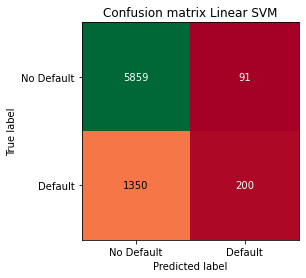

In [138]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix Linear SVM")
plt.gca().invert_yaxis()

In [139]:
print('Linear Support Vector Machine-PCA f1-score : {:.3f} '.format(f1_score(y_test,linearsvm_pca.predict(X_test_pca))))

Linear Support Vector Machine-PCA f1-score : 0.217 


In [140]:
print('Linear Support Vector Machine -PCA Accuracy : {:.3f} '.format(accuracy_score(y_test, linearsvm_pca.predict(X_test_pca))))

Linear Support Vector Machine -PCA Accuracy : 0.808 


<h2>4.Kernalized Support Vector Machine (rbf, poly, and linear)- PCA <h2>
    
### Reducing sample size to 1000 samples with subsampling.Let's map the training samples with random feature mapping to obtain training set and train linear SVMs in parallel to get a unified model on the training set.   

In [141]:
dcc_k = dcc.sample(n = 1000, random_state= 0)

In [142]:
dcc_k.shape

(1000, 24)

In [143]:
X_k = dcc_k.drop(['Default_Payment'],axis =1)
y_k = dcc_k['Default_Payment']
X_train_org_k, X_test_org_k, y_train_k, y_test_k = train_test_split(X_k, y_k, random_state = 0)

In [144]:
scaler = MinMaxScaler()
X_train_k = scaler.fit_transform(X_train_org_k)
X_test_k = scaler.transform(X_test_org_k)

In [145]:
X_train_k.shape

(750, 23)

#### With an Explained Variance ratio of 95% let's perform Principal Component analyisis to reduce the dimensionality

In [146]:
from sklearn.decomposition import PCA
pca_classification_svm = PCA(n_components = 0.95, random_state = 0)
X_train_k_pca = pca_classification_svm.fit_transform(X_train_k)
X_test_k_pca = pca_classification_svm.transform(X_test_k)

#### Let's check how much of dimensionality is reduced using Explained Variance ratio of 95%.

In [147]:
X_train_k_pca.shape

(750, 10)

#### As we can see that total 13 columns were dropped as a part of dimensionality reduction


In [148]:
pca_classification_svm.n_components_

10

In [149]:
gs_kernel_para= {'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'C' : [ 0.001,0.01, 0.1, 1, 10, 100]}
gs_kernel = GridSearchCV(SVC(), param_grid = gs_kernel_para, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
gs_kernel.fit(X_train_k_pca, y_train_k)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, verbose=1)

In [150]:
print("SVC grid search Best Parameters {}".format(gs_kernel.best_params_))

SVC grid search Best Parameters {'C': 10, 'gamma': 1}


<h2>'C': 10, 'gamma': 1, kernel = poly </h2>

In [151]:
kernel_poly = SVC(C = 10, gamma = 1, kernel = 'poly', verbose = 1)
kernel_poly.fit(X_train_k,y_train_k)
y_pred = kernel_poly.predict(X_test_k)

[LibSVM]

In [152]:
print('Training score: {:.3f}'.format(kernel_poly.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(kernel_poly.score(X_test_k, y_test_k)))

Training score: 0.913
Testing score: 0.788


In [153]:
print(classification_report(y_pred,y_test_k))

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       227
         1.0       0.25      0.65      0.36        23

    accuracy                           0.79       250
   macro avg       0.60      0.73      0.62       250
weighted avg       0.89      0.79      0.83       250



In [154]:
print(confusion_matrix(y_pred=y_pred,y_true = y_test_k))

[[182   8]
 [ 45  15]]


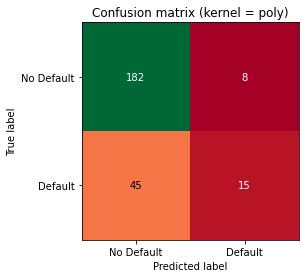

In [155]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test_k), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (kernel = poly)")
plt.gca().invert_yaxis()

In [156]:
print('Support Vector Machine(kernel = poly)-PCA f1-score: {:.3f} '.format(f1_score(y_test_k, kernel_poly.predict(X_test_k))))

Support Vector Machine(kernel = poly)-PCA f1-score: 0.361 


In [157]:
print('Support Vector Machine(kernel = poly)-PCA Accuracy : {:.3f} '.format(accuracy_score(y_test_k, kernel_poly.predict(X_test_k))))

Support Vector Machine(kernel = poly)-PCA Accuracy : 0.788 


<h2>'C': 10, 'gamma': 1, kernel = linear </h2>

In [158]:
kernel_lin = SVC(C = 10, gamma = 1, kernel = 'linear', verbose = 1)
kernel_lin.fit(X_train_k,y_train_k)
y_pred = kernel_lin.predict(X_test_k)

[LibSVM]

In [159]:
print('Training score: {:.3f}'.format(kernel_lin.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(kernel_lin.score(X_test_k, y_test_k)))

Training score: 0.849
Testing score: 0.792


In [160]:
print(classification_report(y_pred,y_test_k))

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88       236
         1.0       0.18      0.79      0.30        14

    accuracy                           0.79       250
   macro avg       0.58      0.79      0.59       250
weighted avg       0.94      0.79      0.85       250



In [161]:
print(confusion_matrix(y_pred=y_pred,y_true = y_test_k))

[[187   3]
 [ 49  11]]


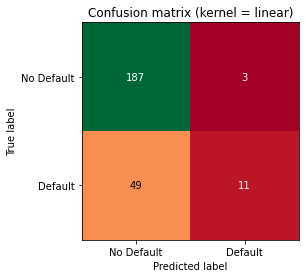

In [162]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test_k), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (kernel = linear)")
plt.gca().invert_yaxis()

In [163]:
print('Support Vector Machine(kernel = linear)-f1 score: {:.3f} '.format(f1_score(y_test_k, kernel_lin.predict(X_test_k))))

Support Vector Machine(kernel = linear)-f1 score: 0.297 


In [164]:
print('Support Vector Machine(kernel = linear)-PCA Accuracy : {:.3f} '.format(accuracy_score(y_test_k, kernel_lin.predict(X_test_k))))

Support Vector Machine(kernel = linear)-PCA Accuracy : 0.792 


<h2>'C': 10, 'gamma': 1, kernel = rbf </h2>

In [165]:
kernel_rbf = SVC(C = 10, gamma = 1, kernel = 'rbf', verbose = 1)
kernel_rbf.fit(X_train_k,y_train_k)
y_pred = kernel_rbf.predict(X_test_k)

[LibSVM]

In [166]:
print('Training score: {:.3f}'.format(kernel_rbf.score(X_train_k, y_train_k)))
print('Testing score: {:.3f}'.format(kernel_rbf.score(X_test_k, y_test_k)))

Training score: 0.907
Testing score: 0.796


In [167]:
print(classification_report(y_pred,y_test_k))

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       229
         1.0       0.25      0.71      0.37        21

    accuracy                           0.80       250
   macro avg       0.61      0.76      0.62       250
weighted avg       0.91      0.80      0.84       250



In [168]:
print(confusion_matrix(y_pred=y_pred,y_true = y_test_k))

[[184   6]
 [ 45  15]]


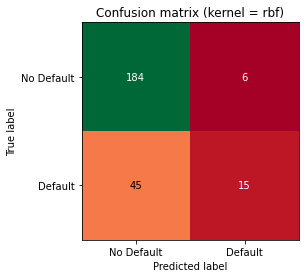

In [169]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test_k), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (kernel = rbf)")
plt.gca().invert_yaxis()

In [170]:
print('Support Vector Machine(kernel = rbf)-PCA f1-score : {:.3f} '.format(f1_score(y_test_k, kernel_rbf.predict(X_test_k))))

Support Vector Machine(kernel = rbf)-PCA f1-score : 0.370 


In [171]:
print('Support Vector Machine(kernel = rbf)-PCA Accuracy : {:.3f} '.format(accuracy_score(y_test_k, kernel_rbf.predict(X_test_k))))

Support Vector Machine(kernel = rbf)-PCA Accuracy : 0.796 


<h2>5.Decision Tree Classification - PCA</h2>
     

In [172]:
gs_dtree_para = {'max_depth': range(1,20),'criterion':['gini','entropy'],'min_samples_leaf' : range(2,50)}
gs_dtree= GridSearchCV(DecisionTreeClassifier(), cv = 5, param_grid = gs_dtree_para , verbose = 1, n_jobs = -1)
gs_dtree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 1824 candidates, totalling 9120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 2546 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 3096 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3746 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4496 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6092 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 7616 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 8666 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9120 out of 9120 | elapsed:  5.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(2, 50)},
             verbose=1)

In [173]:
gs_dtree.best_score_

0.8061333333333334

In [174]:
print("Decision Tree Grid Search Best Parameters {}".format(gs_dtree.best_params_))

Decision Tree Grid Search Best Parameters {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}


#### Applying best parameters 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20 obtained using grid search

In [175]:
dtree_pca = DecisionTreeClassifier(criterion ='entropy', max_depth= 7, min_samples_leaf= 20)
dtree_pca.fit(X_train_pca, y_train)
y_pred = dtree_pca.predict(X_test_pca)

In [176]:
print('Training score: {:.3f}'.format(dtree_pca.score(X_train_pca,y_train)))
print('Testing score: {:.3f}'.format(dtree_pca.score(X_test_pca,y_test)))

Training score: 0.823
Testing score: 0.808


In [177]:
print(classification_report(y_pred = y_pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      5950
         1.0       0.57      0.29      0.38      1550

    accuracy                           0.81      7500
   macro avg       0.70      0.62      0.63      7500
weighted avg       0.78      0.81      0.78      7500



In [178]:
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[5620  330]
 [1107  443]]


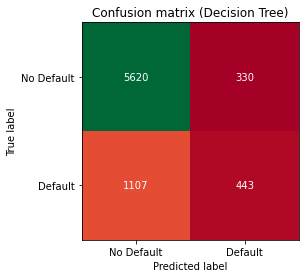

In [179]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'], yticklabels=['No Default','Default'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (Decision Tree)")
plt.gca().invert_yaxis()

In [180]:
print('Decision tree f1-score : {:.3f} '.format(f1_score(y_test, dtree_pca.predict(X_test_pca))))

Decision tree f1-score : 0.381 


In [181]:
print('Decision tree Accuracy : {:.3f} '.format(accuracy_score(y_test, dtree_pca.predict(X_test_pca))))

Decision tree Accuracy : 0.808 


### Let's compare the values of models from Project 1(without PCA) and Project 2(with PCA) 

#### Based on our data, we are more concerened about False Positives and False negative and hence one of the measure to evaluate the model performance can be F1 score. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero

#### Accuracy score before and after PCA

In [182]:
print('KNN-PCA Accuracy - Without PCA :  0.81 ')
print('Logistic Regression-PCA Accuracy - Without PCA : 0.82')
print('Linear Support Vector Machine Accuracy - Without PCA : 0.81')
print('Support Vector Machine(kernel = poly)Accuracy - Without PCA : 0.77')
print('Support Vector Machine(kernel = linear)Accuracy - Without PCA: 0.76')
print('Support Vector Machine(kernel = rbf)Accuracy - Without PCA: 0.76')
print('Decision tree Accuracy - Without PCA: : 0.83')

KNN-PCA Accuracy - Without PCA :  0.81 
Logistic Regression-PCA Accuracy - Without PCA : 0.82
Linear Support Vector Machine Accuracy - Without PCA : 0.81
Support Vector Machine(kernel = poly)Accuracy - Without PCA : 0.77
Support Vector Machine(kernel = linear)Accuracy - Without PCA: 0.76
Support Vector Machine(kernel = rbf)Accuracy - Without PCA: 0.76
Decision tree Accuracy - Without PCA: : 0.83


In [183]:
print('KNN-PCA Accuracy - PCA : {:.2f} '.format(accuracy_score(y_test, knn_pca.predict(X_test_pca))))
print('Logistic Regression-PCA Accuracy : {:.2f} '.format(accuracy_score(y_test, logit_pca.predict(X_test_pca))))
print('Linear Support Vector Machine -PCA Accuracy : {:.2f} '.format(accuracy_score(y_test, linearsvm_pca.predict(X_test_pca))))
print('Support Vector Machine(kernel = poly)-PCA Accuracy : {:.2f} '.format(accuracy_score(y_test_k, kernel_poly.predict(X_test_k))))
print('Support Vector Machine(kernel = linear)-PCA Accuracy : {:.2f} '.format(accuracy_score(y_test_k, kernel_lin.predict(X_test_k))))
print('Support Vector Machine(kernel = rbf)-PCA Accuracy : {:.2f} '.format(accuracy_score(y_test_k, kernel_rbf.predict(X_test_k))))
print('Decision tree Accuracy - PCA : {:.2f} '.format(accuracy_score(y_test, dtree_pca.predict(X_test_pca))))

KNN-PCA Accuracy - PCA : 0.81 
Logistic Regression-PCA Accuracy : 0.81 
Linear Support Vector Machine -PCA Accuracy : 0.81 
Support Vector Machine(kernel = poly)-PCA Accuracy : 0.79 
Support Vector Machine(kernel = linear)-PCA Accuracy : 0.79 
Support Vector Machine(kernel = rbf)-PCA Accuracy : 0.80 
Decision tree Accuracy - PCA : 0.81 


#### f1- score before and after PCA

In [184]:
print('KNN-PCA f1_score - Without PCA :  0.35 ')
print('Logistic f1_score-PCA Accuracy - Without PCA : 0.30')
print('Linear Support Vector Machine f1_score - Without PCA : 0.17')
print('Support Vector Machine(kernel = poly) f1_score - Without PCA : 0.17')
print('Support Vector Machine(kernel = linear) f1_score - Without PCA: 0')
print('Support Vector Machine(kernel = rbf) f1_score - Without PCA: 0')
print('Decision tree f1_score- Without PCA: : 0.46')

KNN-PCA f1_score - Without PCA :  0.35 
Logistic f1_score-PCA Accuracy - Without PCA : 0.30
Linear Support Vector Machine f1_score - Without PCA : 0.17
Support Vector Machine(kernel = poly) f1_score - Without PCA : 0.17
Support Vector Machine(kernel = linear) f1_score - Without PCA: 0
Support Vector Machine(kernel = rbf) f1_score - Without PCA: 0
Decision tree f1_score- Without PCA: : 0.46


In [185]:
print('KNN-PCA f1_score - PCA : {:.2f} '.format(f1_score(y_test, knn_pca.predict(X_test_pca))))
print('Logistic Regression-PCA f1_score : {:.2f} '.format(f1_score(y_test, logit_pca.predict(X_test_pca))))
print('Linear Support Vector Machine -PCA f1_score : {:.2f} '.format(f1_score(y_test, linearsvm_pca.predict(X_test_pca))))
print('Support Vector Machine(kernel = poly)-PCA f1_score : {:.2f} '.format(f1_score(y_test_k, kernel_poly.predict(X_test_k))))
print('Support Vector Machine(kernel = linear)-PCA f1_score : {:.2f} '.format(f1_score(y_test_k, kernel_lin.predict(X_test_k))))
print('Support Vector Machine(kernel = rbf)-PCA f1_score : {:.2f} '.format(f1_score(y_test_k, kernel_rbf.predict(X_test_k))))
print('Decision tree f1_score - PCA : {:.2f} '.format(f1_score(y_test, dtree_pca.predict(X_test_pca))))

KNN-PCA f1_score - PCA : 0.37 
Logistic Regression-PCA f1_score : 0.25 
Linear Support Vector Machine -PCA f1_score : 0.22 
Support Vector Machine(kernel = poly)-PCA f1_score : 0.36 
Support Vector Machine(kernel = linear)-PCA f1_score : 0.30 
Support Vector Machine(kernel = rbf)-PCA f1_score : 0.37 
Decision tree f1_score - PCA : 0.38 


### Conclusion

The objective of Principal Component Analysis is to find a low-dimension set of axes that summarize data. We can clearly observe the following things by comparing similar models that were designed with and without PCA 

1. The accuracy score remains the almost same for all the models after PCA, except in case of SVM where the accuracy score gets better after we reduce the dimension using PCA. Primararily because principal components are linear combinations of original variable so when we peform SVM on dimensionally reduced data we are not working on the original data and hence the accuracy of the SVM on dimensionally reduced data is high due to increasing interpretability and information Rloss.

2. Based on our dataset our focus is on people who are 'defaulters [category = 1]'. Being an imbalanced dataset,the f1-score is a better parameter to compare the model performance as f1-score is more concerned about False Positives and False negatives and the score becomes high only when both precision and recall are high. Hence f1 score of models can better help me compare the model performance.

3. The f1-score slighlty reduces in the models using PCA processed data possibly because while reducing the dimensionality of data we are also reducing a bit of noise from it.

4. Overall we are able to achieve similar result for both PCA and Non-PCA dataset but by performing PCA we are achieving similar results by using a much much smaller computation power.

<h2>6. Apply deep learning models</h2>

In [186]:
# To stack layers on each other we are using sequential model 
from keras.models import Sequential

#To establish connectivity between the nodes we are using Dense
from keras.layers import Dense

#for reproductability we are going to assign seed value of 10
np.random.seed(10)

In [187]:
model = Sequential()
# input layer,  the number of the nodes we would like to consider in the input layer which in our case is 12 nodes
model.add(Dense(12, input_dim=23, activation='relu'))

#To connect the input and output layer we need a hidden layer, the number of nodes in this layer have to be between (output layer node = 1) to (input layer node = 12) 
model.add(Dense(8, activation='relu'))

#For the output layer since we have two disjoint classes (0 or 1), we can use the sigmoid funtion similar to logistic regression. The number of layers in the output function in going to 1.
model.add(Dense(1, activation='sigmoid'))

#### Now let's proceed toward compiling the model, for this purpose we need three parameter, they are objective function, optimizer and evaluation metrics


In [188]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### For fitting the model we need two parameters to be defined, they are epochs and batch_size

In [189]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
2250/2250 [==============================] - 2s 667us/step - loss: 0.4998 - accuracy: 0.7808
Epoch 2/150
2250/2250 [==============================] - 1s 612us/step - loss: 0.4551 - accuracy: 0.8107
Epoch 3/150
2250/2250 [==============================] - 1s 663us/step - loss: 0.4430 - accuracy: 0.8160
Epoch 4/150
2250/2250 [==============================] - 2s 758us/step - loss: 0.4410 - accuracy: 0.8152
Epoch 5/150
2250/2250 [==============================] - 2s 717us/step - loss: 0.4457 - accuracy: 0.8137
Epoch 6/150
2250/2250 [==============================] - 1s 639us/step - loss: 0.4390 - accuracy: 0.8177
Epoch 7/150
2250/2250 [==============================] - 2s 760us/step - loss: 0.4404 - accuracy: 0.8161
Epoch 8/150
2250/2250 [==============================] - 1s 615us/step - loss: 0.4416 - accuracy: 0.8159
Epoch 9/150
2250/2250 [==============================] - 2s 688us/step - loss: 0.4342 - accuracy: 0.8196
Epoch 10/150
2250/2250 [==============================]

#### Model Evaluation

In [190]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

235/235 [==============================] - 0s 604us/step - loss: 0.4261 - accuracy: 0.8272

accuracy: 82.72%


# <font color='red'> End of Project 2 : Classification

######  Initials:                                                                                

######                                                                                                                                                                                                                                            -rp